이것은 [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff) 책의 노트북이다. 가독성을 위해 실행 가능한 코드 블록과 섹션 제목만 포함하고 책의 다른 모든 텍스트 단락, 그림 및 의사 코드는 생략한다.

**무슨 일이 일어나고 있는지 확인하고 싶다면 책과 함께 노트북을 사용하는 것을 권장한다.**

이 노트북은 TensorFlow 2.6 기반이다. (옮긴이: 버전 2.10.0, 애플 실리콘 M1 으로 테스트)

# 5 기계 학습의 기초

## 5.1 일반화: 기계 학습의 목표

### 5.1.1 과소적합 및 과대적합

#### 잡음 훈련 데이터

#### 모호한 특성

#### 드문 특성 및 가짜 상관 관계

**MNIST에 백색-잡음 채널 또는 모든-영 채널 추가**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255 # shape = (60000, 784)

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1) # shape = (60000, 1568)
train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

**잡음 채널 또는 모두-0 채널을 사용하여 MNIST 데이터에 대해 동일 모델 학습**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Metal device set to: Apple M1 Pro
Epoch 1/10


2022-12-09 17:08:42.890690: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-09 17:08:42.890921: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-12-09 17:08:43.089931: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


  1/375 [..............................] - ETA: 2:14 - loss: 2.3529 - accuracy: 0.0703

2022-12-09 17:08:43.308810: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


373/375 [============================>.] - ETA: 0s - loss: 0.6342 - accuracy: 0.8104

2022-12-09 17:08:45.819795: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 3s 7ms/step - loss: 0.6325 - accuracy: 0.8108 - val_loss: 0.2872 - val_accuracy: 0.9137
Epoch 2/10
375/375 [==============================] - 3s 7ms/step - loss: 0.2466 - accuracy: 0.9234 - val_loss: 0.2041 - val_accuracy: 0.9363
Epoch 3/10
375/375 [==============================] - 3s 7ms/step - loss: 0.1610 - accuracy: 0.9502 - val_loss: 0.1475 - val_accuracy: 0.9557
Epoch 4/10
375/375 [==============================] - 3s 7ms/step - loss: 0.1121 - accuracy: 0.9648 - val_loss: 0.1587 - val_accuracy: 0.9494
Epoch 5/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0847 - accuracy: 0.9728 - val_loss: 0.2101 - val_accuracy: 0.9387
Epoch 6/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0603 - accuracy: 0.9809 - val_loss: 0.1391 - val_accuracy: 0.9605
Epoch 7/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0463 - accuracy: 0.9852 - val_loss: 0.1297 - val_accuracy: 0.9651
Epoch 8/10
375/37

2022-12-09 17:09:10.301308: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


367/375 [============================>.] - ETA: 0s - loss: 0.2898 - accuracy: 0.9168

2022-12-09 17:09:12.819333: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 3s 8ms/step - loss: 0.2868 - accuracy: 0.9176 - val_loss: 0.1615 - val_accuracy: 0.9514
Epoch 2/10
375/375 [==============================] - 3s 7ms/step - loss: 0.1188 - accuracy: 0.9651 - val_loss: 0.1056 - val_accuracy: 0.9685
Epoch 3/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0778 - accuracy: 0.9771 - val_loss: 0.1074 - val_accuracy: 0.9675
Epoch 4/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0560 - accuracy: 0.9837 - val_loss: 0.0859 - val_accuracy: 0.9745
Epoch 5/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0423 - accuracy: 0.9877 - val_loss: 0.0815 - val_accuracy: 0.9766
Epoch 6/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0318 - accuracy: 0.9907 - val_loss: 0.0790 - val_accuracy: 0.9779
Epoch 7/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0243 - accuracy: 0.9926 - val_loss: 0.0812 - val_accuracy: 0.9789
Epoch 8/10
375/37

**검증 정확도 비교 그리기**

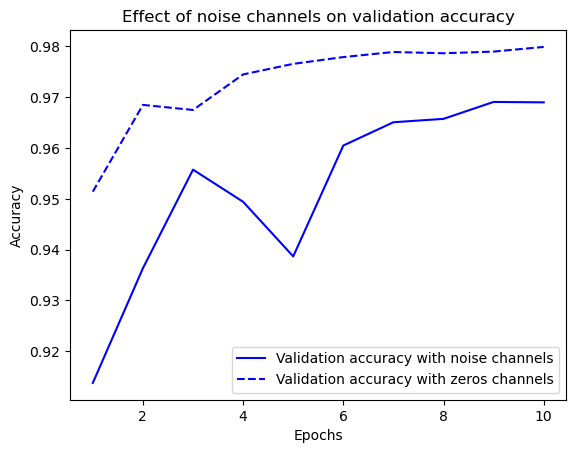

In [3]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### 5.1.2 딥러닝의 일반적 본질

**무작위로 섞인 레이블이 있는 MNIST 모델 적응**

In [4]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
  9/375 [..............................] - ETA: 2s - loss: 2.4245 - accuracy: 0.0964  

2022-12-09 17:10:09.607322: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


373/375 [============================>.] - ETA: 0s - loss: 2.3158 - accuracy: 0.1046

2022-12-09 17:10:12.034694: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 3s 7ms/step - loss: 2.3157 - accuracy: 0.1045 - val_loss: 2.3056 - val_accuracy: 0.1042
Epoch 2/100
375/375 [==============================] - 2s 7ms/step - loss: 2.3001 - accuracy: 0.1139 - val_loss: 2.3111 - val_accuracy: 0.1039
Epoch 3/100
375/375 [==============================] - 2s 7ms/step - loss: 2.2910 - accuracy: 0.1254 - val_loss: 2.3169 - val_accuracy: 0.1059
Epoch 4/100
375/375 [==============================] - 2s 7ms/step - loss: 2.2763 - accuracy: 0.1381 - val_loss: 2.3223 - val_accuracy: 0.1045
Epoch 5/100
375/375 [==============================] - 3s 7ms/step - loss: 2.2580 - accuracy: 0.1540 - val_loss: 2.3381 - val_accuracy: 0.1067
Epoch 6/100
375/375 [==============================] - 2s 7ms/step - loss: 2.2367 - accuracy: 0.1691 - val_loss: 2.3539 - val_accuracy: 0.1023
Epoch 7/100
375/375 [==============================] - 2s 7ms/step - loss: 2.2127 - accuracy: 0.1832 - val_loss: 2.3661 - val_accuracy: 0.1010
Epoch 8/100

375/375 [==============================] - 3s 7ms/step - loss: 0.9534 - accuracy: 0.6821 - val_loss: 4.5703 - val_accuracy: 0.0978
Epoch 59/100
375/375 [==============================] - 3s 7ms/step - loss: 0.9406 - accuracy: 0.6843 - val_loss: 4.6406 - val_accuracy: 0.1016
Epoch 60/100
375/375 [==============================] - 2s 7ms/step - loss: 0.9265 - accuracy: 0.6926 - val_loss: 4.6779 - val_accuracy: 0.1007
Epoch 61/100
375/375 [==============================] - 2s 7ms/step - loss: 0.9114 - accuracy: 0.6971 - val_loss: 4.7727 - val_accuracy: 0.1005
Epoch 62/100
375/375 [==============================] - 2s 7ms/step - loss: 0.8978 - accuracy: 0.7021 - val_loss: 4.8044 - val_accuracy: 0.0986
Epoch 63/100
375/375 [==============================] - 2s 7ms/step - loss: 0.8840 - accuracy: 0.7070 - val_loss: 4.8732 - val_accuracy: 0.0994
Epoch 64/100
375/375 [==============================] - 2s 7ms/step - loss: 0.8719 - accuracy: 0.7125 - val_loss: 4.9286 - val_accuracy: 0.1010
Epoch

#### 매니폴드(manifold) 가설
- 현실 세계에서 발생하는 많은 고차원 데이터 세트는 실제로 고차원 공간 내부의 저차원 다양체에 영향을 받는다. (WikiPedia)

#### 일반화 원천의 보간

#### 딥러닝이 작동하는 이유

#### 훈련 데이터가 중요

## 5.2 기계 학습 모델 평가

### 5.2.1 훈련, 검증, 그리고 테스트셋

#### 간단한 홀드아웃 검증
- [데이터셋 셔플링 -> 훈련 훈 검증 세트 구성 -> 훈련 및 검증 -> 하이퍼파라미터 튜닝]:반복 -> 테스트 데이터셋 제외한 모든 데이터셋으로 모델 훈련
- 옮긴이: Scikit-Learn 라이브러리의 `train_test_split` 함수: 배열 또는 행렬을 무작위 훈련 및 테스트 하위셋으로 분할.

#### K-겹(K-fold) 검증
- 옮긴이: Scikit-Learn 라이브러리의 cross_validation 함수 참고

#### 무작위로 K-겹 검증 순회
- 옮긴이: Scikit-Learn 라이브러리의 RepeatedKFold 및 RepeatedStratifiedKFold 참조

### 5.2.2 상식적인 기준선 깨기

### 5.2.3 모델 평가에서 염두해 둘 것

## 5.3 모델 적응(fit) 향상

### 5.3.1 경사하강법의 주요 매개변수 조정

**잘못된 높은 학습률로 MNIST 모델 훈련** (learning_rate = 1.)

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
  8/375 [..............................] - ETA: 2s - loss: 44351.7734 - accuracy: 0.1914

2022-12-09 17:14:20.987012: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - ETA: 0s - loss: 1008.1437 - accuracy: 0.3821

2022-12-09 17:14:23.381464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 3s 7ms/step - loss: 1008.1437 - accuracy: 0.3821 - val_loss: 2.8237 - val_accuracy: 0.3027
Epoch 2/10
375/375 [==============================] - 3s 7ms/step - loss: 4.8501 - accuracy: 0.2287 - val_loss: 2.2198 - val_accuracy: 0.2188
Epoch 3/10
375/375 [==============================] - 3s 7ms/step - loss: 5.2623 - accuracy: 0.2144 - val_loss: 2.2358 - val_accuracy: 0.1870
Epoch 4/10
375/375 [==============================] - 3s 7ms/step - loss: 2.6437 - accuracy: 0.2122 - val_loss: 2.3295 - val_accuracy: 0.2011
Epoch 5/10
375/375 [==============================] - 3s 7ms/step - loss: 3.1634 - accuracy: 0.2160 - val_loss: 2.0864 - val_accuracy: 0.2065
Epoch 6/10
375/375 [==============================] - 3s 7ms/step - loss: 2.6470 - accuracy: 0.2300 - val_loss: 2.6280 - val_accuracy: 0.2114
Epoch 7/10
375/375 [==============================] - 3s 7ms/step - loss: 2.7491 - accuracy: 0.2443 - val_loss: 1.9993 - val_accuracy: 0.2962
Epoch 8/10
375

**동일한 모델에 적절한 학습률 적용** (learning_rate = 0.2)

In [6]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
  8/375 [..............................] - ETA: 2s - loss: 5.2676 - accuracy: 0.3896  

2022-12-09 17:14:52.214428: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


371/375 [============================>.] - ETA: 0s - loss: 0.3723 - accuracy: 0.9074

2022-12-09 17:14:54.636155: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 3s 7ms/step - loss: 0.3703 - accuracy: 0.9080 - val_loss: 0.1633 - val_accuracy: 0.9555
Epoch 2/10
375/375 [==============================] - 3s 7ms/step - loss: 0.1416 - accuracy: 0.9623 - val_loss: 0.1219 - val_accuracy: 0.9678
Epoch 3/10
375/375 [==============================] - 3s 7ms/step - loss: 0.1195 - accuracy: 0.9720 - val_loss: 0.1789 - val_accuracy: 0.9653
Epoch 4/10
375/375 [==============================] - 3s 7ms/step - loss: 0.1009 - accuracy: 0.9774 - val_loss: 0.1819 - val_accuracy: 0.9663
Epoch 5/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0896 - accuracy: 0.9808 - val_loss: 0.2642 - val_accuracy: 0.9586
Epoch 6/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0826 - accuracy: 0.9833 - val_loss: 0.2460 - val_accuracy: 0.9704
Epoch 7/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0782 - accuracy: 0.9854 - val_loss: 0.2439 - val_accuracy: 0.9747
Epoch 8/10
375/37

### 5.3.2 더 나은 아키텍처로 향상

### 5.3.3 모델 용량 증가

**MNIST에 대한 단순 로지스틱 회귀 (logistic regression)**

In [7]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
 16/375 [>.............................] - ETA: 2s - loss: 1.9527 - accuracy: 0.3950

2022-12-09 17:15:24.132059: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


374/375 [============================>.] - ETA: 0s - loss: 0.6754 - accuracy: 0.8319

2022-12-09 17:15:26.229570: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 3s 6ms/step - loss: 0.6745 - accuracy: 0.8321 - val_loss: 0.3584 - val_accuracy: 0.9053
Epoch 2/20
375/375 [==============================] - 2s 6ms/step - loss: 0.3513 - accuracy: 0.9030 - val_loss: 0.3061 - val_accuracy: 0.9148
Epoch 3/20
375/375 [==============================] - 2s 6ms/step - loss: 0.3157 - accuracy: 0.9122 - val_loss: 0.2920 - val_accuracy: 0.9175
Epoch 4/20
375/375 [==============================] - 2s 6ms/step - loss: 0.2993 - accuracy: 0.9164 - val_loss: 0.2811 - val_accuracy: 0.9218
Epoch 5/20
375/375 [==============================] - 2s 6ms/step - loss: 0.2896 - accuracy: 0.9192 - val_loss: 0.2751 - val_accuracy: 0.9247
Epoch 6/20
375/375 [==============================] - 2s 6ms/step - loss: 0.2828 - accuracy: 0.9211 - val_loss: 0.2716 - val_accuracy: 0.9252
Epoch 7/20
375/375 [==============================] - 2s 6ms/step - loss: 0.2783 - accuracy: 0.9223 - val_loss: 0.2701 - val_accuracy: 0.9243
Epoch 8/20
375/37

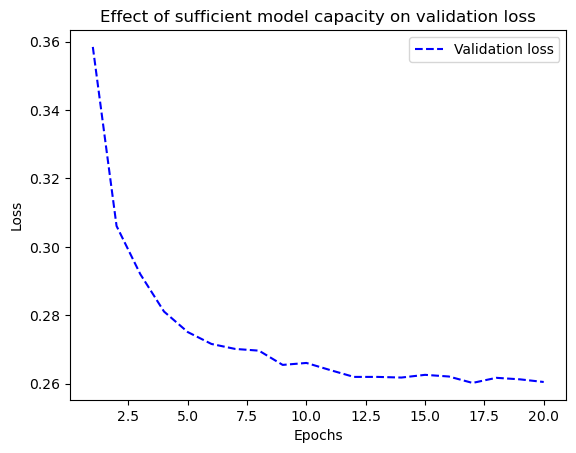

In [8]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of sufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [9]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
  1/375 [..............................] - ETA: 3:13 - loss: 2.3273 - accuracy: 0.1250

2022-12-09 17:16:20.039292: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


368/375 [============================>.] - ETA: 0s - loss: 0.3634 - accuracy: 0.8969

2022-12-09 17:16:22.702069: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 3s 8ms/step - loss: 0.3600 - accuracy: 0.8979 - val_loss: 0.1818 - val_accuracy: 0.9466
Epoch 2/20
375/375 [==============================] - 3s 7ms/step - loss: 0.1577 - accuracy: 0.9533 - val_loss: 0.1347 - val_accuracy: 0.9592
Epoch 3/20
375/375 [==============================] - 3s 7ms/step - loss: 0.1097 - accuracy: 0.9672 - val_loss: 0.1220 - val_accuracy: 0.9637
Epoch 4/20
375/375 [==============================] - 3s 7ms/step - loss: 0.0859 - accuracy: 0.9749 - val_loss: 0.1053 - val_accuracy: 0.9692
Epoch 5/20
375/375 [==============================] - 3s 7ms/step - loss: 0.0686 - accuracy: 0.9792 - val_loss: 0.1004 - val_accuracy: 0.9694
Epoch 6/20
375/375 [==============================] - 3s 8ms/step - loss: 0.0559 - accuracy: 0.9829 - val_loss: 0.0997 - val_accuracy: 0.9707
Epoch 7/20
375/375 [==============================] - 3s 7ms/step - loss: 0.0468 - accuracy: 0.9853 - val_loss: 0.0964 - val_accuracy: 0.9732
Epoch 8/20
375/37

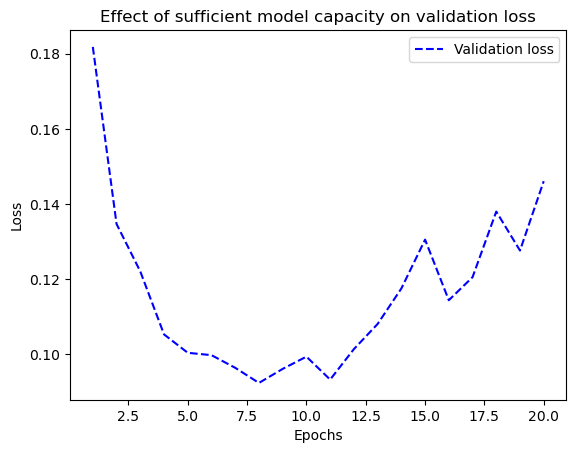

In [10]:
import matplotlib.pyplot as plt
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of sufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## 5.4 일반화 향상

### 5.4.1 데이터셋 큐레이션 (curation)

### 5.4.2 특성 공학

### 5.4.3 조기 종료 사용
- EarlyStopping 콜백

### 5.4.4 모델 규제

#### 네트워크 크기 축소

**원본 모델**

In [11]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20


2022-12-09 17:17:34.192872: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 0.5485 - accuracy: 0.7693

2022-12-09 17:17:35.485094: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 2s 46ms/step - loss: 0.5485 - accuracy: 0.7693 - val_loss: 0.4315 - val_accuracy: 0.8724
Epoch 2/20
30/30 [==============================] - 0s 17ms/step - loss: 0.3487 - accuracy: 0.8971 - val_loss: 0.3455 - val_accuracy: 0.8766
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2506 - accuracy: 0.9279 - val_loss: 0.2913 - val_accuracy: 0.8880
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1960 - accuracy: 0.9395 - val_loss: 0.2822 - val_accuracy: 0.8879
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1565 - accuracy: 0.9530 - val_loss: 0.3018 - val_accuracy: 0.8799
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1305 - accuracy: 0.9595 - val_loss: 0.3022 - val_accuracy: 0.8826
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1064 - accuracy: 0.9687 - val_loss: 0.3536 - val_accuracy: 0.8712
Epoch 8/20
30/30 [======

**작은 용량의 모델**

In [12]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20


2022-12-09 17:18:00.310797: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 0.6489 - accuracy: 0.6171

2022-12-09 17:18:01.513592: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 2s 40ms/step - loss: 0.6489 - accuracy: 0.6171 - val_loss: 0.6146 - val_accuracy: 0.7605
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.5782 - accuracy: 0.7394 - val_loss: 0.5659 - val_accuracy: 0.7048
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.5215 - accuracy: 0.7961 - val_loss: 0.5192 - val_accuracy: 0.7961
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.4739 - accuracy: 0.8543 - val_loss: 0.4948 - val_accuracy: 0.8241
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.4408 - accuracy: 0.8875 - val_loss: 0.4768 - val_accuracy: 0.8577
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.4162 - accuracy: 0.9088 - val_loss: 0.4668 - val_accuracy: 0.8611
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3949 - accuracy: 0.9255 - val_loss: 0.4658 - val_accuracy: 0.8533
Epoch 8/20
30/30 [======

**큰 용량의 모델**

In [13]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20


2022-12-09 17:18:13.418192: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 0.5502 - accuracy: 0.7552

2022-12-09 17:18:14.758945: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 2s 46ms/step - loss: 0.5502 - accuracy: 0.7552 - val_loss: 0.3136 - val_accuracy: 0.8716
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2439 - accuracy: 0.9027 - val_loss: 0.2707 - val_accuracy: 0.8915
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1504 - accuracy: 0.9426 - val_loss: 0.7215 - val_accuracy: 0.7530
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1047 - accuracy: 0.9657 - val_loss: 0.3044 - val_accuracy: 0.8884
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0222 - accuracy: 0.9946 - val_loss: 1.3980 - val_accuracy: 0.7138
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0290 - accuracy: 0.9907 - val_loss: 0.5462 - val_accuracy: 0.8859
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 9.9649e-04 - accuracy: 0.9999 - val_loss: 0.6360 - val_accuracy: 0.8882
Epoch 8/20
30/30 [==

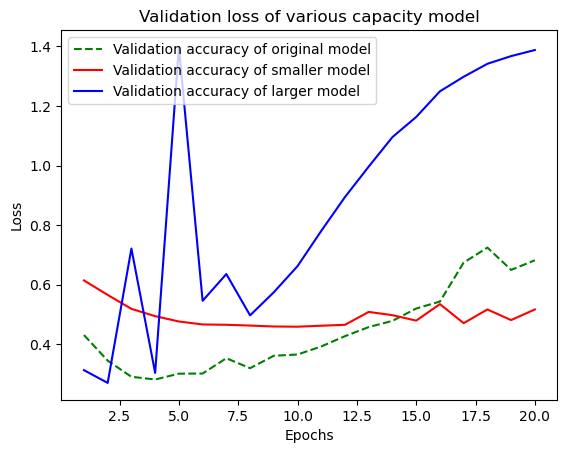

In [27]:
import matplotlib.pyplot as plt
val_loss_original = history_original.history["val_loss"]
val_loss_smaller = history_smaller_model.history["val_loss"]
val_loss_larger = history_larger_model.history["val_loss"]
epochs = range(1, len(val_loss_original)+1)
plt.plot(epochs, val_loss_original, "g--",
         label="Validation accuracy of original model")
plt.plot(epochs, val_loss_smaller, "r-",
         label="Validation accuracy of smaller model")
plt.plot(epochs, val_loss_larger, "b-",
         label="Validation accuracy of larger model")
plt.title("Validation loss of various capacity model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### 가중치 규제 추가
- 일반적으로 작은 딥러닝 모델에서 사용

**모델에 L2 가중치 규제 추가**

In [28]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20


2022-12-09 22:33:25.076118: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 0.5829 - accuracy: 0.7921

2022-12-09 22:33:26.697313: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 2s 54ms/step - loss: 0.5829 - accuracy: 0.7921 - val_loss: 0.4516 - val_accuracy: 0.8742
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3935 - accuracy: 0.8943 - val_loss: 0.3891 - val_accuracy: 0.8812
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3246 - accuracy: 0.9172 - val_loss: 0.3867 - val_accuracy: 0.8740
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2940 - accuracy: 0.9270 - val_loss: 0.3550 - val_accuracy: 0.8897
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2774 - accuracy: 0.9327 - val_loss: 0.3554 - val_accuracy: 0.8875
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2610 - accuracy: 0.9389 - val_loss: 0.3646 - val_accuracy: 0.8848
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2510 - accuracy: 0.9430 - val_loss: 0.3623 - val_accuracy: 0.8851
Epoch 8/20
30/30 [======

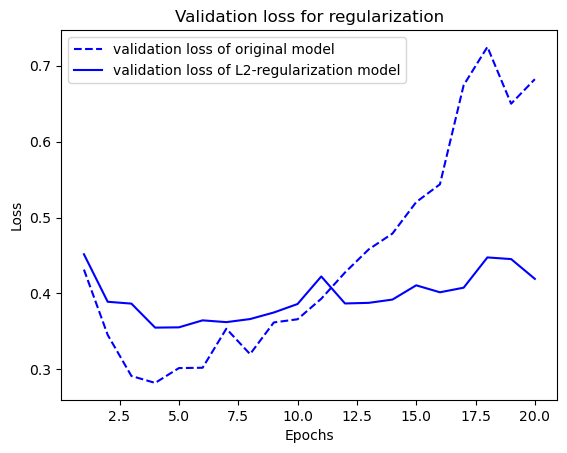

In [35]:
import matplotlib.pyplot as plt
val_loss_original = history_original.history["val_loss"]
val_loss_12_reg = history_l2_reg.history["val_loss"]
epochs = range(1, len(val_loss_original)+1)
plt.plot(epochs, val_loss_original, "b--", label="validation loss of original model")
plt.plot(epochs, val_loss_12_reg, "b-", label="validation loss of L2-regularization model")
plt.title("Validation loss for L2 regularization")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


**케라스에서 사용 가능한 다른 가중치 규제**

In [38]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### 드롭아웃 추가
- 가장 효과적이고 널리 사용

**IMDB 모델에 드롭아웃 추가**

In [39]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20


2022-12-09 23:01:07.742924: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 0.5956 - accuracy: 0.6806

2022-12-09 23:01:09.028331: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 2s 46ms/step - loss: 0.5956 - accuracy: 0.6806 - val_loss: 0.4808 - val_accuracy: 0.8569
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.4518 - accuracy: 0.8175 - val_loss: 0.3727 - val_accuracy: 0.8796
Epoch 3/20
30/30 [==============================] - 0s 17ms/step - loss: 0.3668 - accuracy: 0.8608 - val_loss: 0.3222 - val_accuracy: 0.8829
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3156 - accuracy: 0.8853 - val_loss: 0.2922 - val_accuracy: 0.8888
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2712 - accuracy: 0.9015 - val_loss: 0.2782 - val_accuracy: 0.8916
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2365 - accuracy: 0.9189 - val_loss: 0.2761 - val_accuracy: 0.8891
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2091 - accuracy: 0.9310 - val_loss: 0.2774 - val_accuracy: 0.8919
Epoch 8/20
30/30 [======

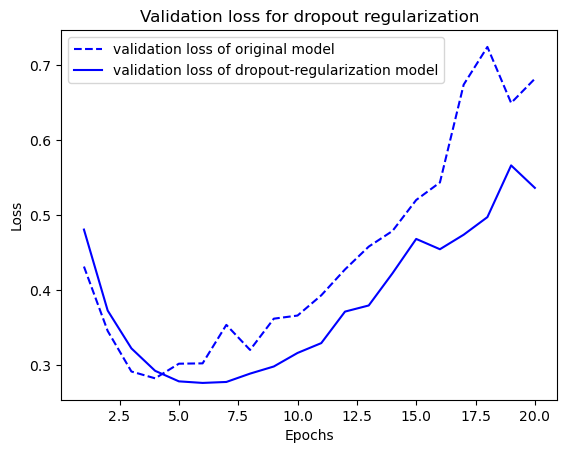

In [40]:
import matplotlib.pyplot as plt
val_loss_original = history_original.history["val_loss"]
val_loss_dropout = history_dropout.history["val_loss"]
epochs = range(1, len(val_loss_original)+1)
plt.plot(epochs, val_loss_original, "b--", label="validation loss of original model")
plt.plot(epochs, val_loss_dropout, "b-", label="validation loss of dropout-regularization model")
plt.title("Validation loss for dropout regularization")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## 5.5 요약